# P set3 test1
a
还需使用多种方法计算第一个时间步

In [1]:
import numpy as np
import sympy as sym
from sympy import sin,cos
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt

In [217]:
def diff(domainl=4,cum_tsteps=1000,deltax=0.05,deltat=0.05,difftype="leapfrog-central",starttype="FU"\
    ,filter="nofilter",filter_a=0.05):
    # initial domain in para in function
    gridn   = int(domainl / deltax) + 1 # 格点数，包含端点
    gridt   = cum_tsteps
    print("积分时间长度:",cum_tsteps*deltat,"s")
    # initial dye c -pulse
    c = np.zeros([gridn,gridt]) # n x t
    # print("check output c shape: ",c.shape)
    c[1:int(0.5/deltax)+1,0] = 1

    u = 1.  # advection volicity

    cr = u*deltat/deltax
    print("check cr = ",cr)


    if (difftype=="leapfrog-central"):
        print("diff type is ","leapfrog-central")

        if (starttype=="FU"):
            print("start type is ","forward-upwind")
            for i in range(1,gridn): #Notice the limits here
                c[i,1] =  c[i,0] - cr * (c[i,0]-c[i-1,0]); #first order forward
            c[0,1] = c[gridn-1,1] # 周期边界条件

        if (starttype=="3steps"):
            print("start type is ","3steps")
            c_half = c[:,0] # 0.5 time step
            for i in range(1,gridn): #Notice the limits here
                c_half[i] =  c[i,0] - cr/2 * (c[i,0]-c[i-1,0]); #first order forward
            c_half[0] = c[gridn-1,0] # 周期边界条件

            for i in range(1,gridn-1): #Notice the limits here
                c[i,1] =  c[i,0] - cr/2 * (c_half[i+1]-c[i-1,0]); #first order forward
            c[0,1] = c[gridn-1,1] # 周期边界条件


        filter_switch = 1 # turn on filter
        print("filter type is :"+filter)
        if (filter=="nofilter"):
            filter_switch = 0.

        for j in range(1,gridt-1):
            #
            for i in range(1,gridn-1): #Notice the limits here
                c[i,j+1] =  c[i,j-1] - cr * (c[i+1,j]-c[i-1,j]); #2nd-order
                c[i,j]   = c[i,j] + filter_switch * ( filter_a/2 * (c[i,j+1]-2*c[i,j]+c[i,j-1]) )
            # 2nd-order 边界改用一阶精度
            c[gridn-1,j+1] = c[gridn-1,j] - cr * (c[gridn-1,j]-c[gridn-2,j])
            # filter after one step finish
            # for i in range(0,gridn):
                # c[i,j]   = c[i,j] + filter_switch * ( filter_a/2 * (c[i,j+1]-2*c[i,j]+c[i,j-1]) )
            c[0,j] = c[gridn-2,j] # 周期边界条件,二阶需要连接两个点
            c[1,j] = c[gridn-1,j]
            
            
    return c

In [245]:
domainl = 4. 
cum_t   = 200.
deltax  = 0.05
deltat  = 0.05
gridn   = int(domainl / deltax) + 1
gridt   = int(cum_t/deltat)     + 1
c_result = diff(deltax=deltax,deltat=deltat,filter="asselin",filter_a=0.05)
# c_result = diff(deltax=deltax,deltat=deltat,starttype="3steps")

积分时间长度: 50.0 s
check cr =  1.0
diff type is  leapfrog-central
start type is  forward-upwind
filter type is :asselin


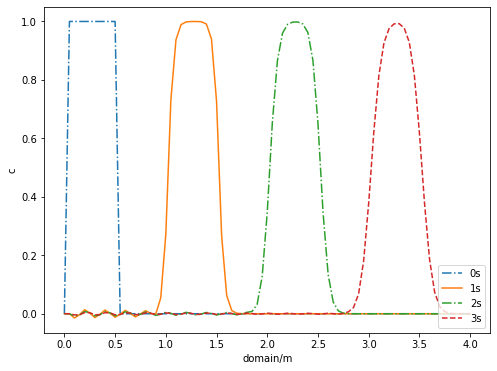

In [246]:
fig,ax = plt.subplots(1,figsize=(8,6))
# custom_xlim = (3, 4)
# custom_ylim = (0, 1.1)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax.plot(np.linspace(0,domainl,gridn), c_result[:,0],'-.', label='0s')
ax.plot(np.linspace(0,domainl,gridn), c_result[:,int(1./deltat)],'-', label='1s')
ax.plot(np.linspace(0,domainl,gridn), c_result[:,int(2./deltat)],'-.', label='2s')
ax.plot(np.linspace(0,domainl,gridn), c_result[:,int(3./deltat)],'--', label='3s')
ax.legend(loc='lower right')
plt.xlabel('domain/m')
plt.ylabel('c')
plt.savefig('./p3t1_filt0.05_cr=1.png')
    # ax[nn].legend(')